In [6]:
import numpy as np
import matplotlib.pyplot as plt

from evspy.loadsteps import LoadSteps
from evspy.coupled_fdm import distorted_isotache_model
load=LoadSteps()
# load.add_load_step(duration = 1e8,load = 25,rate = 1e-8,type_test = 'IL',cv=7)
# load.add_load_step(duration = 1e8,load = 50,rate = 1e-7,type_test = 'IL',cv=7)
# load.add_load_step(duration = 1e8,load = 25,rate = 1e-8,type_test = 'IL',cv=7)
# load.add_load_step(duration = 5e7,load = 25,rate = 1e-7,type_test = 'IL',cv=7)
# load.add_load_step(duration = 5e7,load = 25,rate = 0,type_test = 'CRS',cv=7)

load.add_load_step(duration = 1e5,load = 5,  rate = 1e-8, type_test = 'CRS',cv=7)
load.add_load_step(duration = 1e5,load = 15, rate = 1e-6, type_test = 'CRS',cv=7)
load.add_load_step(duration = 1e5,load = 30, rate = 1e-8, type_test = 'CRS',cv=7)
load.add_load_step(duration = 1e5,load = 70, rate = 1e-6, type_test = 'CRS',cv=7)
load.add_load_step(duration = 1e5,load = 100,rate = 1e-8, type_test = 'CRS',cv=7)
load.add_load_step(duration = 1e5,load = 200,rate = 1e-8, type_test = 'IL', cv=7)
load.add_load_step(duration = 1e8,load = 200,rate = 1e-8, type_test = 'IL', cv=7)
load.add_load_step(duration = 1e8,load = 20, rate = -1e-6,type_test = 'CRS',cv=7)
load.add_load_step(duration = 5e6,load = 20, rate = -1e-8,type_test = 'IL', cv=7)
load.add_load_step(duration = 1e7,load = 20, rate = 0,    type_test = 'CRS',cv=7)

Cc = 0.3
Cr = 0.3 /5
CalphaNC = 0.3 * 0.06
e_ref1=2;
e_init=1.9
m1=0.7
b1=-0.8
m2=2.5
b2=-5.

beta2=3
beta3=23

H=0.1
# m1=0.95  
# b1=-0.84 
# m2=2.5 
# b2=-3.3

model = distorted_isotache_model(load,sigma0=1,H=H,dimt=12000, 
                                 Cc=Cc,Cr=Cr,CalphaNC=CalphaNC,
                                 e_init=e_init,e0 = e_ref1,
                                 m1=m1,b1=b1,m2=m2,b2=b2,
                                 beta2=beta2,beta3=beta3)
model.initialize_decoupled(erateinits = 1e-10)
model.run_iterations()

/home/thomasvergote/Dropbox/NUS - PhD/09 - Scripts/modules/evspy/evspy/distorted_isotaches.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  return 2/(np.array([np.float(i) for i in OCR_x])**beta2+1)


In [7]:
model.plotting_stresspath(sigp=2.6)
plt.ylim(1,2.1)
plt.xlim(0.1,1e3)

TypeError: plotting_stresspath() got an unexpected keyword argument 'sigp'

In [ ]:
model.plotting_stresspath(sigp=300)
plt.ylim(1,2.1)
plt.xlim(0.1,1e3)

(1e-08, 1e-05)

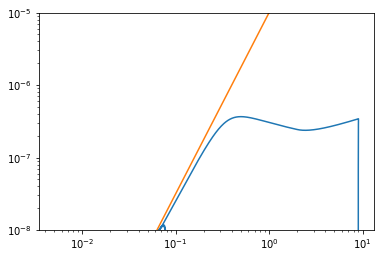

In [4]:
from evspy.viscous_swelling import swelling_law, power_law
plt.loglog(model.OCR-1,model.erates)
plt.plot(np.arange(1,10,0.01)-1,power_law(np.arange(1,10,0.01),model.m2,model.b2))
plt.ylim(1e-8,1e-5)

In [5]:
model.plotting_timeseries('IL1')

KeyError: 'IL1'